In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [176]:
college = pd.read_csv('College.csv')
college

Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 19 columns]

In [177]:
#Rename the index to be more descriptive
college.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [142]:
# Using map function
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})

In [143]:
print("Modified DataFrame:\n",college)

Modified DataFrame:
                          Unnamed: 0  Private   Apps  Accept  Enroll  \
0      Abilene Christian University        1   1660    1232     721   
1                Adelphi University        1   2186    1924     512   
2                    Adrian College        1   1428    1097     336   
3               Agnes Scott College        1    417     349     137   
4         Alaska Pacific University        1    193     146      55   
..                              ...      ...    ...     ...     ...   
772         Worcester State College        0   2197    1515     543   
773               Xavier University        1   1959    1805     695   
774  Xavier University of Louisiana        1   2097    1915     695   
775                 Yale University        1  10705    2453    1317   
776    York College of Pennsylvania        1   2989    1855     691   

     Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  \
0           23         52         2885          5

In [144]:
#perform Exploratory Data Analysis by using descriptive statistics 
college.describe()

Private          Apps        Accept       Enroll   Top10perc  \
count  777.000000    777.000000    777.000000   777.000000  777.000000   
mean     0.727156   3001.638353   2018.804376   779.972973   27.558559   
std      0.445708   3870.201484   2451.113971   929.176190   17.640364   
min      0.000000     81.000000     72.000000    35.000000    1.000000   
25%      0.000000    776.000000    604.000000   242.000000   15.000000   
50%      1.000000   1558.000000   1110.000000   434.000000   23.000000   
75%      1.000000   3624.000000   2424.000000   902.000000   35.000000   
max      1.000000  48094.000000  26330.000000  6392.000000   96.000000   

        Top25perc   F.Undergrad   P.Undergrad      Outstate   Room.Board  \
count  777.000000    777.000000    777.000000    777.000000   777.000000   
mean    55.796654   3699.907336    855.298584  10440.669241  4357.526384   
std     19.804778   4850.420531   1522.431887   4023.016484  1096.696416   
min      9.000000    139.000000      1.000000   2340.000000  1780.000000   
25%     41.000000    992.000000     95.000000   7320.000000  3597.000000   
50%     54.000000   1707.000000    353.000000   9990.000000  4200.000000   
75%     69.000000   4005.000000    967.000000  12925.000000  5050.000000   
max    100.000000  31643.000000  21836.000000  21700.000000  8124.000000   

             Books     Personal         PhD    Terminal   S.F.Ratio  \
count   777.000000   777.000000  777.000000  777.000000  777.000000   
mean    549.380952  1340.642214   72.660232   79.702703   14.089704   
std     165.105360   677.071454   16.328155   14.722359    3.958349   
min      96.000000   250.000000    8.000000   24.000000    2.500000   
25%     470.000000   850.000000   62.000000   71.000000   11.500000   
50%     500.000000  1200.000000   75.000000   82.000000   13.600000   
75%     600.000000  1700.000000   85.000000   92.000000   16.500000   
max    2340.000000  6800.000000  103.000000  100.000000   39.800000   

       perc.alumni        Expend  Grad.Rate  
count   777.000000    777.000000  777.00000  
mean     22.743887   9660.171171   65.46332  
std      12.391801   5221.768440   17.17771  
min       0.000000   3186.000000   10.00000  
25%      13.000000   6751.000000   53.00000  
50%      21.000000   8377.000000   65.00000  
75%      31.000000  10830.000000   78.00000  
max      64.000000  56233.000000  118.00000

In [156]:
from google.colab import data_table
data_table.DataTable(college.corr)

<ipython-input-158-d8dfe5a58e89>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(college.corr, dtype=np.bool))


[Text(0.5, 1.0, 'Numeric features corrplot')]

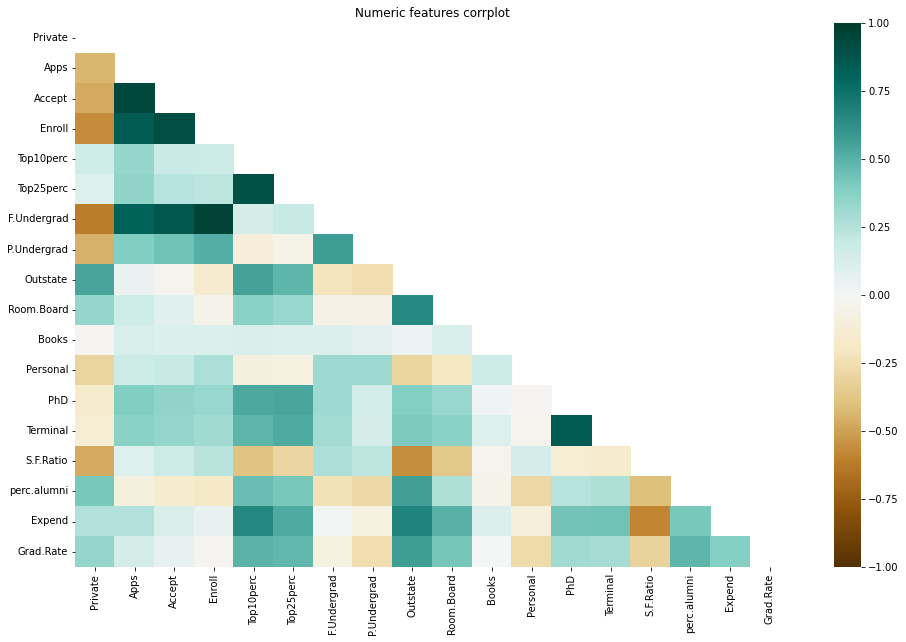

In [158]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(college.corr, dtype=np.bool))
sns.heatmap(college.corr, mask=mask, vmin=-1, vmax=1, cmap='BrBG').set(title="Numeric features corrplot")

<Figure size 432x288 with 0 Axes>

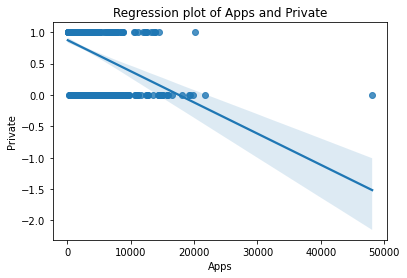

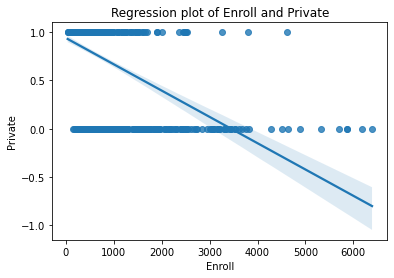

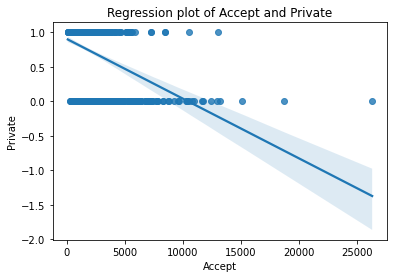

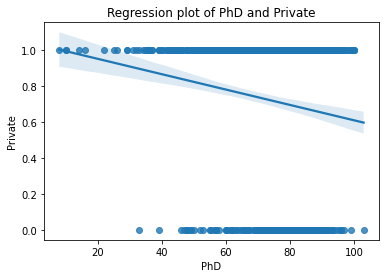

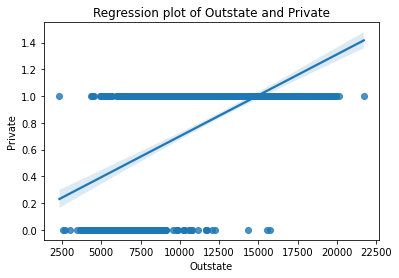

In [82]:
   plt.figure() # Creating a rectangle (figure) for each plot
# Regression Plot also 
   
variables = ['Apps', 'Enroll', 'Accept', 'PhD', 'Outstate']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
# Regression Plot also 
    g = sns.regplot(x=var, y='Private', data=college).set(title=f'Regression plot of {var} and Private');
    g

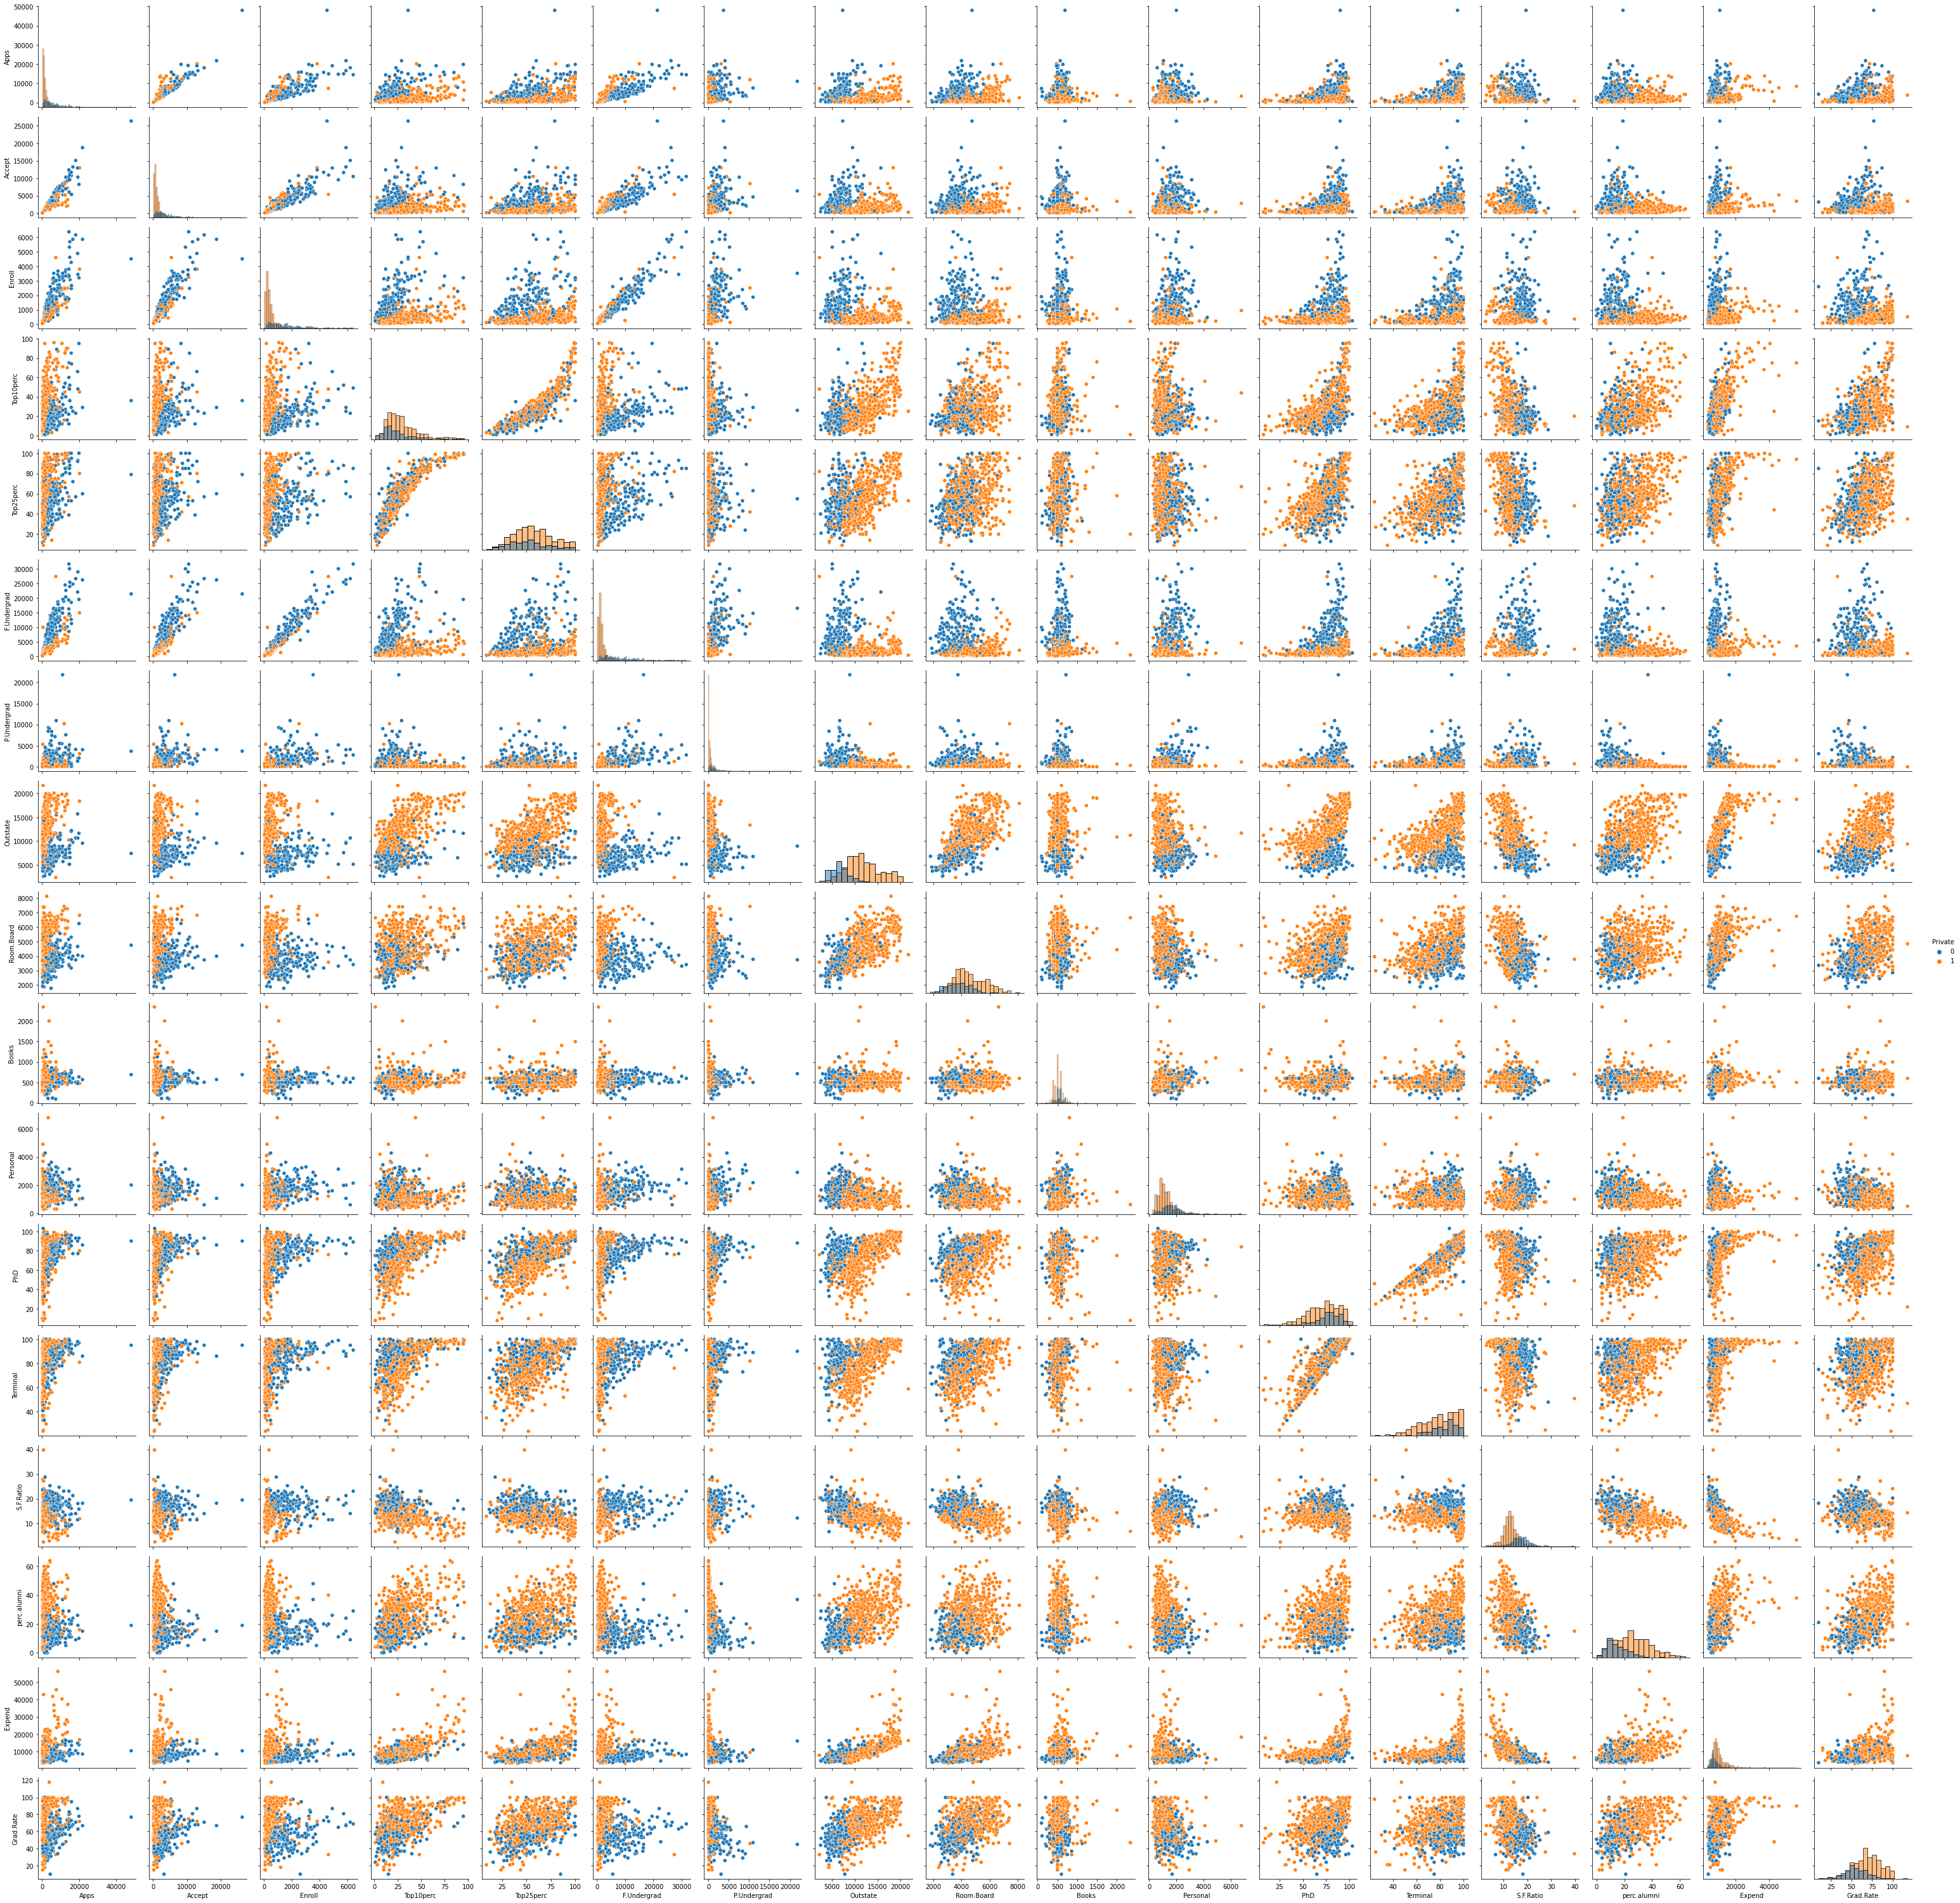

In [104]:
g = sns.PairGrid(college, hue="Private")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

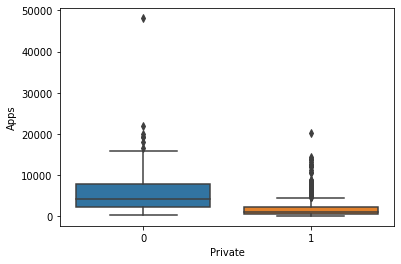

In [173]:
 sns.boxplot(x='Private', y='Apps', data=college)

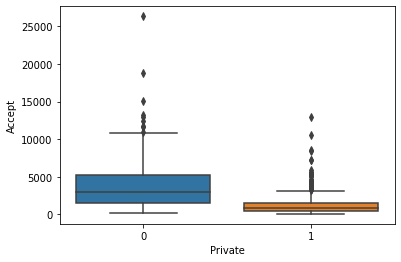

In [174]:
 sns.boxplot(x='Private', y='Accept', data=college)

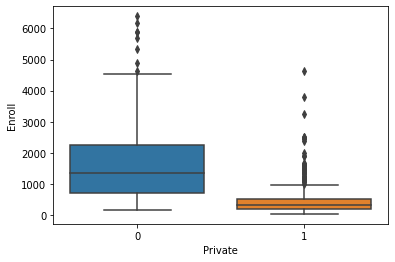

In [171]:
 sns.boxplot(x='Private', y='Enroll', data=college)

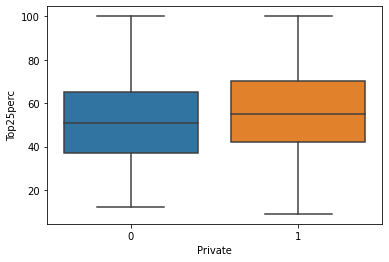

In [172]:
 sns.boxplot(x='Private', y='Top25perc', data=college)

In [83]:
from sklearn.preprocessing import normalize
from sklearn import preprocessing
# split dataset in features and target variable
feature_cols = ['Apps', 'Accept', 'Enroll', 'F.Undergrad','Books', 'Room.Board', 'Outstate', 'Personal','Top25perc', 'Top10perc', 'P.Undergrad']
X_raw = college[feature_cols]  # Features
X_values = X_raw.values
# normalize the input
# X = normalize(X_values)
scaler = preprocessing.StandardScaler().fit(X_values)
X = scaler.transform(X_values)
y = college.Private   # Target variable
#not normalize: if it was print(x) then that was normalized
print(X_raw.head())

   Apps  Accept  Enroll  F.Undergrad  Books  Room.Board  Outstate  Personal  \
0  1660    1232     721         2885    450        3300      7440      2200   
1  2186    1924     512         2683    750        6450     12280      1500   
2  1428    1097     336         1036    400        3750     11250      1165   
3   417     349     137          510    450        5450     12960       875   
4   193     146      55          249    800        4120      7560      1500   

   Top25perc  Top10perc  P.Undergrad  
0         52         23          537  
1         29         16         1227  
2         50         22           99  
3         89         60           63  
4         44         16          869  


In [86]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [90]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.api as sm

In [88]:
formula= 'Private~Apps+Accept+Enroll+Books+Outstate+Personal'

In [50]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [100]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [101]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# conf matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 55   7]
 [  5 167]]


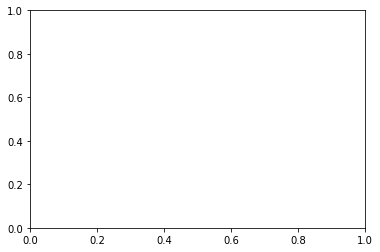

In [131]:
# create heatmap
fig, ax = plt.subplots()

Text(0.5, 15.0, 'Predicted label')

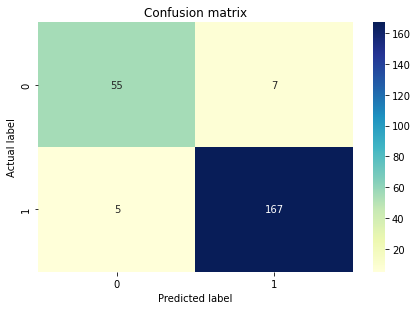

In [132]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
# metrics for Accuracy, Precision, Recall, and Specificity.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        62
           1       0.96      0.97      0.97       172

    accuracy                           0.95       234
   macro avg       0.94      0.93      0.93       234
weighted avg       0.95      0.95      0.95       234



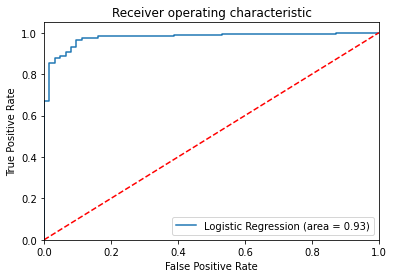

In [103]:
#Plot and interpret the ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Part 2**

In [118]:
# part 2 split dataset in features and target variable 
feature_cols2 = ['Apps', 'S.F.Ratio', 'Grad.Rate','Books', 'Outstate']
X_raw2 = college[feature_cols2]  # Features
X_values2 = X_raw2.values
# normalize the input
# X = normalize(X_values)
scaler2 = preprocessing.StandardScaler().fit(X_values2)
X2 = scaler2.transform(X_values2)
y2 = college.Private   # Target variable
#not normalize: if it was print(x) then that was normalized
print(X_raw2.head())

   Apps  S.F.Ratio  Grad.Rate  Books  Outstate
0  1660       18.1         60    450      7440
1  2186       12.2         56    750     12280
2  1428       12.9         54    400     11250
3   417        7.7         59    450     12960
4   193       11.9         15    800      7560


In [119]:
# split X and y into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [120]:
formula2= 'Private~Outstate+F.Undergrad+S.F.Ratio+Grad.Rate'

In [121]:
# instantiate the model (using the default parameters)
logreg2 = LogisticRegression(random_state=16)

In [122]:
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)

LogisticRegression()

In [123]:
y_pred2 = logreg.predict(X_test2)
y_pred2

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [124]:
# conf matrix 2
cnf_matrix2 = confusion_matrix(y_test2, y_pred2)
print(cnf_matrix2)

[[ 54   8]
 [  8 164]]


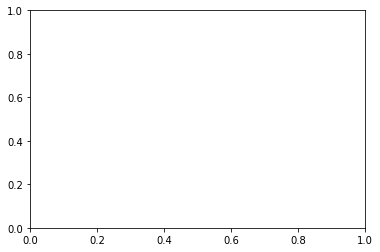

In [133]:
# create heatmap
fig, ax = plt.subplots()

Text(0.5, 15.0, 'Predicted label2')

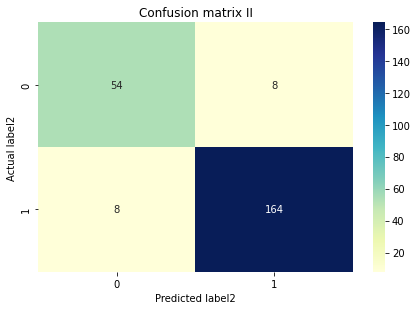

In [135]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix II', y=1.1)
plt.ylabel('Actual label2')
plt.xlabel('Predicted label2')

In [136]:
#Report and interpret metrics for Accuracy, Precision, Recall, and Specificity.
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        62
           1       0.95      0.95      0.95       172

    accuracy                           0.93       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.93      0.93      0.93       234



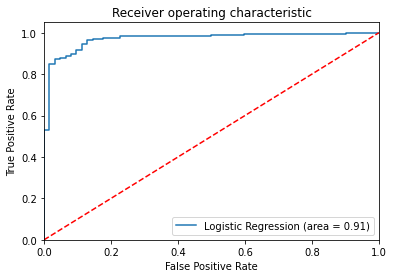

In [137]:
#Plot and interpret the ROC
logit_roc_auc = roc_auc_score(y_test2, logreg.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, logreg.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()